# <u>Data Science Essentials</u>

## <u>Topic</u>: Feature Shuffling

## <u>Category</u>: Feature Selection

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## 1. Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *

from sklearn.base import (
    BaseEstimator,
    TransformerMixin
)

from feature_engine.selection import SelectByShuffling

## 2. Getting the Data

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [3]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


## 3. Demo - Feature-engine

### 3.1 Training the Selector

In [4]:
clf = RandomForestClassifier(n_estimators=10, random_state=7)

selector = SelectByShuffling(
    estimator=clf,
    scoring="accuracy",
    cv=3,
    threshold=0,
    random_state=7
).fit(X_train, y_train)

### 3.2 Selector Attributes

In [5]:
print(f"Model Accuracy with all features: {selector.initial_model_performance_}")

Model Accuracy with all features: 0.9340217265016847


In [6]:
print("Change in accuracy due to Feature Shuffing:\n")
selector.performance_drifts_

Change in accuracy due to Feature Shuffing:



{'mean radius': 1.4523062623394978e-05,
 'mean texture': 0.0,
 'mean perimeter': -0.002236551644010709,
 'mean area': -1.4523062623506e-05,
 'mean smoothness': 0.0,
 'mean compactness': -0.002192982456140413,
 'mean concavity': -0.004415011037527505,
 'mean concave points': 0.008786452887184937,
 'mean symmetry': 0.0,
 'mean fractal dimension': 0.0,
 'radius error': -0.004400487974904221,
 'texture error': 0.0,
 'perimeter error': 0.00440048797490411,
 'area error': -0.0066079934936679185,
 'smoothness error': -0.002207505518763808,
 'compactness error': -0.004385964912280604,
 'concavity error': -1.4523062623394978e-05,
 'concave points error': -0.004415011037527505,
 'symmetry error': -0.002192982456140413,
 'fractal dimension error': -0.002192982456140413,
 'worst radius': -0.0066370396189148195,
 'worst texture': 0.00877192982456132,
 'worst perimeter': 0.004356918787033814,
 'worst area': 0.006593470431044524,
 'worst smoothness': 0.0,
 'worst compactness': -0.00877192982456143,
 

In [7]:
print("Features to drop after shuffling:\n")
selector.features_to_drop_

Features to drop after shuffling:



['mean perimeter',
 'mean compactness',
 'mean concavity',
 'radius error',
 'area error',
 'smoothness error',
 'compactness error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst compactness',
 'worst concave points',
 'worst symmetry']

### 3.3 Visualizing Performance Drifts after Shuffling

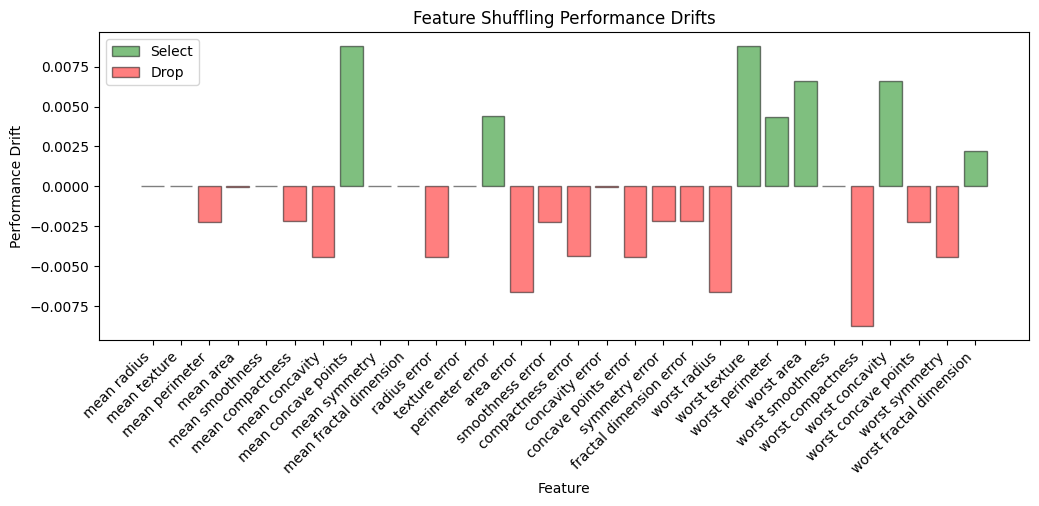

In [8]:
plt.figure(figsize=(12, 4))
ax = plt.gca()

drifts = pd.Series(selector.performance_drifts_)

pos_drifts = drifts.loc[lambda ser: ser.ge(0)]
pos_indices = [X_train.columns.get_loc(f"{col}") for col in pos_drifts.index]
ax.bar(
    pos_indices,
    pos_drifts.values,
    color="green",
    edgecolor="black",
    alpha=0.5,
    label="Select"
)

neg_drifts = drifts.loc[lambda ser: ser.lt(0)]
neg_indices = [X_train.columns.get_loc(f"{col}") for col in neg_drifts.index]
ax.bar(
    neg_indices,
    neg_drifts.values,
    color="red",
    edgecolor="black",
    alpha=0.5,
    label="Drop"
)

ax.set_xticks(range(len(X_train.columns)))
ax.set_xticklabels(X_train.columns, rotation=45, ha="right")

ax.set(
    xlabel="Feature",
    ylabel="Performance Drift",
    title="Feature Shuffling Performance Drifts"
)

ax.legend(loc="upper left")

plt.show()

### 3.4 Selecting Features using the Selector

In [9]:
selector.transform(X_train)

,mean radius,mean texture,mean area,mean smoothness,mean concave points,mean symmetry,mean fractal dimension,texture error,perimeter error,concavity error,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst fractal dimension
546,10.32,16.35,324.9,0.09434,0.005495,0.1885,0.06201,0.9670,1.356,0.01012,21.77,71.12,384.9,0.1285,0.04384,0.07399
432,20.18,19.54,1250.0,0.11330,0.125900,0.1724,0.06053,1.0010,3.008,0.05546,25.07,146.00,1479.0,0.1665,0.53080,0.08075
174,10.66,15.15,349.6,0.08792,0.000000,0.1928,0.05975,1.9250,2.155,0.00000,19.20,73.20,408.3,0.1076,0.00000,0.06164
221,13.56,13.90,561.3,0.10510,0.044510,0.1962,0.06303,0.4981,2.011,0.02544,17.13,101.10,686.6,0.1376,0.25770,0.08177
289,11.37,18.89,396.0,0.08713,0.021730,0.2013,0.05955,1.9740,1.954,0.01376,26.14,79.29,459.3,0.1118,0.07529,0.06994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,15.28,22.41,710.6,0.09057,0.032630,0.1727,0.06317,0.4956,1.344,0.01774,28.03,113.80,973.1,0.1301,0.36300,0.09772
300,19.53,18.90,1217.0,0.11500,0.106200,0.1792,0.06552,1.1610,7.237,0.05638,26.24,171.10,2053.0,0.1495,0.61210,0.09929
509,15.46,23.95,731.3,0.11830,0.085200,0.1807,0.07083,1.9610,2.937,0.06019,36.33,117.70,909.4,0.1732,0.59110,0.10670
230,17.05,19.08,895.0,0.11410,0.109000,0.2131,0.06325,0.6790,2.153,0.03055,24.89,133.50,1189.0,0.1703,0.50180,0.09061


- The original dataset had 30 features
- After performing feature shuffling, we plotted the performance drifts using bar plots:
  - The bars in green indicate those features for which the model accuracy dropped below the initial accuracy after shuffling its values, indicating usefulness
  - The bars in red indicate those features for which the model performance improved beyond the initial accuracy after shuffling its values
- For the given threshold, the selector selected 16 features to retain in the transformed dataset

## 4. Demo - Custom Implementation

In [10]:
class CustomSelectByShuffling(BaseEstimator, TransformerMixin):
  """
  Description:
  ------------
  This is a custom transformer that'll perform feature selection by shuffling the feature values
  """
  def __init__(self,
               estimator,
               scoring="accuracy",
               cv=3,
               threshold=0.0,
               random_state=None):
    """
    Parameters:
    ------------
    estimator: any estimator instance
               The learning algorithm used for evaluating performance drift of features.

    scoring: str
             Any valid scikit-learn scoring metric string. Defaults to 'accuracy'.

    cv: int
        The no. of folds to use for performing internal cross-validation to evaluate performance drifts.

    threshold: float
               The minimum value above which the change in model performance should be, to retain a feature.

    random_state: int
                  Controls randomness.
    """
    self.estimator = estimator
    self.scoring = scoring
    self.cv = cv
    self.threshold = threshold
    self.random_state = random_state


  def fit(self, X, y):
    """
    Description:
    ------------
    This function will evaluate the performance drifts of each feature and identify the features to drop
    
    Parameters:
    ------------
    X: dataframe
       Dataset containing the feature vectors

    y: series or array-like
       The truth labels for given input dataset
    """
    if self.random_state:
        np.random.seed(self.random_state)

    self.feature_names_in_ = X.columns.to_list()
    self.n_features_in_ = len(self.feature_names_in_)
    
    cv = StratifiedKFold(n_splits=self.cv)
    scores = cross_val_score(
        self.estimator,
        X,
        y,
        cv=cv,
        scoring=self.scoring,
        n_jobs=-1
    )
    self.initial_model_performance_ = np.mean(scores)

    self.features_to_drop_ = []
    self.performance_drifts_ = dict()
    original_indices = X.index.to_list()
    columns = X.select_dtypes(include="number").columns
    for column in columns:
        shuffled_indices = np.random.permutation(original_indices)
        X_temp = X.assign(**{
            f"{column}": X.loc[shuffled_indices, column].values
        })
        
        temp_scores = cross_val_score(
            self.estimator,
            X_temp,
            y,
            cv=cv,
            scoring=self.scoring,
            n_jobs=-1
        )
        temp_score = np.mean(temp_scores)
        
        drift = self.initial_model_performance_ - temp_score
        self.performance_drifts_[column] = drift

        if drift < self.threshold:
            self.features_to_drop_.append(column)
            
    return self


  def transform(self, X):
    """
    Description:
    ------------
    This function will return the given dataset with only those features whose performance drift exceeds the threshold
    
    Parameters:
    ------------
    X: dataframe
       Dataset to transform
    """
    return X.drop(columns=self.features_to_drop_)

### 4.1 Training the Custom Selector

In [11]:
clf = RandomForestClassifier(n_estimators=5, random_state=7)

custom_selector = CustomSelectByShuffling(
    estimator=clf,
    scoring="accuracy",
    cv=3,
    threshold=0.0,
    random_state=7
).fit(X_train, y_train)

### 4.2 Custom Selector Attributes

In [12]:
custom_selector.initial_model_performance_

0.9362582781456954

In [13]:
custom_selector.performance_drifts_

{'mean radius': -0.013201463924712442,
 'mean texture': -0.002192982456140302,
 'mean perimeter': 0.002207505518763919,
 'mean area': -0.01314337167421853,
 'mean smoothness': 0.0,
 'mean compactness': 0.0,
 'mean concavity': -0.002192982456140413,
 'mean concave points': -0.013157894736842035,
 'mean symmetry': 0.0,
 'mean fractal dimension': -0.002192982456140413,
 'radius error': -0.002178459393516796,
 'texture error': -0.004371441849657209,
 'perimeter error': -0.004415011037527505,
 'area error': 0.002207505518763919,
 'smoothness error': -0.002207505518763697,
 'compactness error': -0.006578947368421129,
 'concavity error': 0.0,
 'concave points error': 0.002222028581387314,
 'symmetry error': 0.002207505518763919,
 'fractal dimension error': 0.006578947368421129,
 'worst radius': 0.002207505518763919,
 'worst texture': -0.004415011037527505,
 'worst perimeter': -0.002192982456140413,
 'worst area': 0.0021348902056465002,
 'worst smoothness': 1.4523062623506e-05,
 'worst compact

In [14]:
custom_selector.features_to_drop_

['mean radius',
 'mean texture',
 'mean area',
 'mean concavity',
 'mean concave points',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'smoothness error',
 'compactness error',
 'worst texture',
 'worst perimeter',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

### 4.3 Visualizing Performance Drifts after Shuffling using Custom Selector

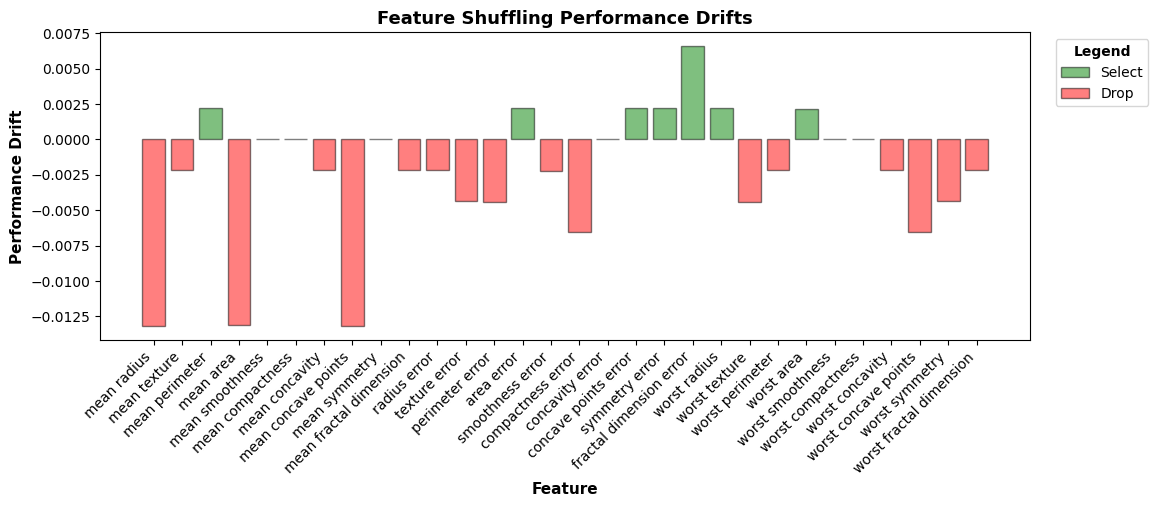

In [15]:
custom_selector_drifts = pd.Series(custom_selector.performance_drifts_)

selected_drifts = custom_selector_drifts.loc[lambda ser: ser.ge(custom_selector.threshold)]
selected_cols_indices = [X_train.columns.get_loc(column) for column in selected_drifts.index]

dropped_drifts = custom_selector_drifts.loc[lambda ser: ser.lt(custom_selector.threshold)]
dropped_cols_indices = [X_train.columns.get_loc(column) for column in dropped_drifts.index]

fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(
    selected_cols_indices,
    selected_drifts.values,
    color="green",
    alpha=0.5,
    edgecolor="black",
    label="Select"
)

ax.bar(
    dropped_cols_indices,
    dropped_drifts.values,
    color="red",
    alpha=0.5,
    edgecolor="black",
    label="Drop"
)

ax.set_xticks(np.arange(custom_selector.n_features_in_))
ax.set_xticklabels(custom_selector.feature_names_in_, rotation=45, ha="right")
ax.set_xlabel("Feature", fontweight="bold", fontsize=11)
ax.set_ylabel("Performance Drift", fontweight="bold", fontsize=11)
ax.set_title("Feature Shuffling Performance Drifts", fontweight="bold", fontsize=13)

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    title="Legend",
    title_fontproperties=dict(weight="bold")
)

plt.show()

### 4.4 Selecting Features using the Custom Selector

In [16]:
custom_selector.transform(X_train)

,mean perimeter,mean smoothness,mean compactness,mean symmetry,area error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst area,worst smoothness,worst compactness
546,65.31,0.09434,0.04994,0.1885,12.970,0.01012,0.005495,0.01560,0.002606,11.25,384.9,0.1285,0.08842
432,133.80,0.11330,0.14890,0.1724,52.490,0.05546,0.019100,0.02451,0.004005,22.03,1479.0,0.1665,0.29420
174,67.49,0.08792,0.04302,0.1928,21.980,0.00000,0.000000,0.03265,0.001002,11.54,408.3,0.1076,0.06791
221,88.59,0.10510,0.11920,0.1962,21.030,0.02544,0.008360,0.01842,0.002918,14.98,686.6,0.1376,0.26980
289,72.17,0.08713,0.05008,0.2013,17.490,0.01376,0.009924,0.03416,0.002928,12.36,459.3,0.1118,0.09708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,98.92,0.09057,0.10520,0.1727,19.530,0.01774,0.006009,0.01172,0.002575,17.80,973.1,0.1301,0.32990
300,129.50,0.11500,0.16420,0.1792,133.000,0.05638,0.017330,0.01884,0.004787,25.93,2053.0,0.1495,0.41160
509,103.80,0.11830,0.18700,0.1807,32.520,0.06019,0.020410,0.02105,0.006000,17.11,909.4,0.1732,0.49670
230,113.40,0.11410,0.15720,0.2131,31.980,0.03055,0.013840,0.01177,0.002336,19.59,1189.0,0.1703,0.39340


- The original dataset had 30 features
- After performing feature shuffling, we plotted the performance drifts using bar plots
- For the given threshold, the custom selector selected 13 features to retain in the transformed dataset